# Практическая работа №2
Кирбаба Денис, R3238

## Прогнозирование цен на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`. 


### Импорт библиотек
Импортируем необходимые библиотеки:

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [124]:
train_data = pd.read_csv('/data/notebook_files/train.csv')
test_data = pd.read_csv('/data/notebook_files/test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [125]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [127]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 16, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Uti

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [128]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [129]:
missing_value_checker(test_edited)

[]
0


In [130]:
missing_value_checker(train_edited)

[]
0


In [131]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [132]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [133]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [134]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [135]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели

In [136]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import layers

number_of_neurons_in_layer = [70, 60, 50, 40, 30]
activation_functions = ['relu', 'relu'] # first value - activation for the hidden layer(s), second - for the output layer

model = keras.Sequential([
  keras.layers.Dense(number_of_neurons_in_layer[0], activation=activation_functions[0], use_bias=True, kernel_regularizer=keras.regularizers.l2(1e-4), name='hidden_layer_1'),
  keras.layers.Dense(number_of_neurons_in_layer[1], activation=activation_functions[0], use_bias=True, kernel_regularizer=keras.regularizers.l2(1e-4), name='hidden_layer_2'),
  keras.layers.Dense(number_of_neurons_in_layer[2], activation=activation_functions[0], use_bias=True, kernel_regularizer=keras.regularizers.l2(1e-4), name='hidden_layer_3'),
  keras.layers.Dense(number_of_neurons_in_layer[3], activation=activation_functions[0], use_bias=True, kernel_regularizer=keras.regularizers.l2(1e-4), name='hidden_layer_4'),
  keras.layers.Dense(number_of_neurons_in_layer[4], activation=activation_functions[0], use_bias=True, kernel_regularizer=keras.regularizers.l2(1e-4), name='hidden_layer_5'),
  keras.layers.Dense(1, activation=activation_functions[1], kernel_regularizer=keras.regularizers.l2(1e-4), name='output_layer')
])

tf.random.set_seed(40) # Для обеспечения воспроизводимости результатов устанавливается функция seed

Скомпилируем нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [137]:
# Для оценки потерь используем MSLE (MeanSquaredLogarithmicError), а также метрики MAE (Mean absolute error) и MSE (Mean squared error) 
model.compile(loss=keras.losses.mean_squared_logarithmic_error, optimizer="adam", metrics=['mae', 'mse'])

Тренируем модель на обучающих данных `X_train` и `y_train`

In [138]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
234/234 [==============================] - 1s 2ms/step - loss: 4.3626 - mae: 101542.4922 - mse: 19134316544.0000
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.1375 - mae: 51456.4766 - mse: 10411322368.0000
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.1162 - mae: 45727.0273 - mse: 7676205568.0000
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 0.0901 - mae: 38493.1523 - mse: 4629725184.0000
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.0713 - mae: 32157.8145 - mse: 2897435136.0000
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.0654 - mae: 29796.3730 - mse: 2501170176.0000
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 0.0644 - mae: 29867.5762 - mse: 2333125888.0000
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: 0.0631 - mae: 29284.4414 - mse: 2282177024.0000
Epoch 9/100
2

**Оценка полученных результатыов**

График зависимости абсолютной ошибки от количества эпох


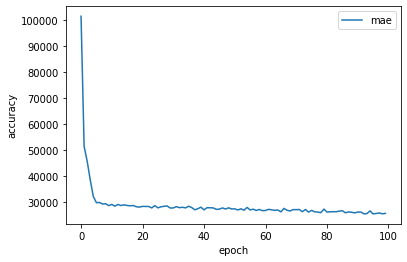

In [139]:
plt.plot(pd.DataFrame(history.history['mae']), label='mae')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
print('График зависимости абсолютной ошибки от количества эпох')

График зависимости средней квадратичной ошибки от количества эпох


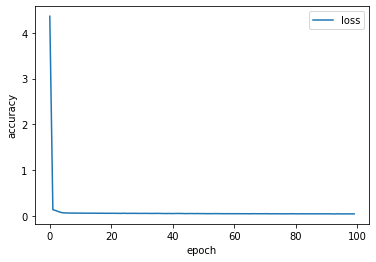

In [140]:
plt.plot(pd.DataFrame(history.history['loss']), label='loss')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
print('График зависимости средней квадратичной ошибки от количества эпох')

In [141]:
scores = model.evaluate(X_val, y_val, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 0.0393 - mae: 23577.0156 - mse: 1267093888.0000


### Предсказание

In [142]:
preds = model.predict(test_edited)
preds

In [143]:
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output

,Id,SalePrice
0,1461,148913.453125
1,1462,103702.601562
2,1463,197891.093750
3,1464,190172.812500
4,1465,172587.875000
...,...,...
1454,2915,70300.335938
1455,2916,94653.851562
1456,2917,184829.265625
1457,2918,106166.914062


**Выводы**

Наилучший результат (mae: 23577) был получен при пятислойной нейронной сети с количеством нейронов соответственно [70, 60, 50, 40, 30] с нейронами смещениями, функциями активации ReLu (Rectified Linear Unit) = max(0, x), а также используемой регулязации по ядру слоя.
Для оценки потерь использовалась MSLE (Mean Squared Logarithmic Error), а также метрики MAE (Mean absolute error) и MSE (Mean squared error).
Использованный оптимизатор - Adam - реализующий алгоритм Адама.

Нейрон смещения нужен для того, чтобы иметь возможность получать выходной результат, путем сдвига графика функции активации вправо или влево. Также нейроны смещения помогают в том случае, когда все входные нейроны получают на вход 0 и независимо от того какие у них веса, они все передадут на следующий слой 0, но не в случае присутствия нейрона смещения.

Функция активации решает, должен ли нейрон активироваться или нет. Это означает, что он будет решать, важен ли вход нейрона в сеть в процессе прогнозирования с использованием более простых математических операций. Цель функции активации - добавить нелинейности нейронной сети.
Основные функции активации:
 - Binary Step Function (f(x)=0, if x<0 and 1 else)
 - Linear Activation Function (f(x)=x)
 - Sigmoid (f(x)=1/(1+e^-x)) dom(f):[0;1]
 - Tanh Function (Hyperbolic Tangent) (f(x)=(e^x-e^-x)/(e^x+e^-x)) dom(f):[-1;1]
 - ReLu (Rectified Linear Unit) (f(x)=max(0, x))
 - ...

Регуляризация — метод добавления некоторых дополнительных ограничений к условию с целью предотвратить переобучение. Часто имеет вид штрафа за сложность модели.

Функция потерь вычисляет ошибку работы нейронной сети и по ней мы отслеживаем эффективности работы сети. Каждый метод считает ошибку по-разному и нам нужно выбрать тот, который приносит наилучший результат.

Оптимизатор - вид алгоритма, по которому будет обучаться нейронная сеть, они меняют веса сети таким образом, чтобы минимизировать ошибку.

Итерация - это счетчик, который увеличивается каждый раз, когда нейронная сеть проходит один тренировочный сет.

Эпоха - это счетчик, который увеличивается каждый раз, когда мы проходим весь набор тренировочных сетов.

MSE. Суть метода заключается по сути в том, чтобы минимизировать сумму квадратов отклонений фактических значений от расчётных (SSE - «Sum of Squared Errors»). Если полученную сумму разделить на число наблюдений, то получится значение MSE. Наличие квадратов позволяет получить некоторую оценку расстояния от фактических значений до линии (расчётных значений). MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

MAE - сумма модулей отклонений фактических значений от расчётных, разделить на число наблюдений. Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам.